# Donald Trump Stock Portfolio

https://en.wikipedia.org/wiki/Donald_Trump

https://money.usnews.com/investing/articles/stocks-owned-by-donald-trumphttps://en.wikipedia.org/wiki/Joe_Biden

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf

In [2]:
# input
symbols = ['DJT', 'AAPL','MSFT','NVDA','AMZN', 'GOOG','BRK-B','AVGO']
start = '2024-10-01'
end = '2025-05-04'


# Read data 
df = yf.download(symbols,start,end, auto_adjust=False)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  8 of 8 completed


Ticker,AAPL,AMZN,AVGO,BRK-B,DJT,GOOG,MSFT,NVDA
Date,,,,,,,,
2024-10-01,225.713242,185.130005,166.518600,457.410004,16.160000,168.037704,419.009460,116.981178
2024-10-02,226.281982,184.759995,169.690491,456.670013,15.810000,166.930222,415.463654,118.830879
2024-10-03,225.174408,181.960007,170.913498,452.959991,16.170000,166.830460,414.876038,122.830238
2024-10-04,226.301941,186.509995,175.636505,461.970001,16.500000,168.177383,414.397949,124.899902
2024-10-07,221.203156,180.800003,174.085388,453.500000,18.389999,164.016846,407.903992,127.699455


In [3]:
df.tail()

Ticker,AAPL,AMZN,AVGO,BRK-B,DJT,GOOG,MSFT,NVDA
Date,,,,,,,,
2025-04-28,210.139999,187.699997,192.470001,530.940002,25.830000,162.419998,391.160004,108.730003
2025-04-29,211.210007,187.389999,191.169998,534.570007,24.980000,162.059998,394.040009,109.019997
2025-04-30,212.500000,184.419998,192.470001,533.250000,24.540001,160.889999,395.260010,108.919998
2025-05-01,213.320007,190.199997,197.330002,530.229980,24.730000,162.789993,425.399994,111.610001
2025-05-02,205.350006,189.979996,203.639999,539.799988,25.469999,165.809998,435.279999,114.500000


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
Cash = 100000
# Calculate equal percentage to invest per stock
num_stocks = len(symbols)
percent_invest = [1/num_stocks] * num_stocks  # Equal weights

# Print out the investment amount per stock
print('Percentage of invest:')
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print(f'{i}: ${cost:,.2f} ({x*100:.2f}%)')

Percentage of invest:
AAPL: $12,500.00 (12.50%)
AMZN: $12,500.00 (12.50%)
AVGO: $12,500.00 (12.50%)
BRK-B: $12,500.00 (12.50%)
DJT: $12,500.00 (12.50%)
GOOG: $12,500.00 (12.50%)
MSFT: $12,500.00 (12.50%)
NVDA: $12,500.00 (12.50%)


In [8]:
# Get the first row (start prices) and drop NaNs
start_prices = df.iloc[0].dropna()

# Update symbols to match valid data
valid_symbols = start_prices.index.tolist()
num_stocks = len(valid_symbols)
percent_invest = [1/num_stocks] * num_stocks  # Equal allocation for valid symbols

# Calculate and print number of shares to buy
print('Number of Shares:')
for symbol, pct, price in zip(valid_symbols, percent_invest, start_prices):
    cost = pct * Cash
    shares = int(cost / price)
    print(f'{symbol}: {shares}')

Number of Shares:
AAPL: 55
AMZN: 67
AVGO: 75
BRK-B: 27
DJT: 773
GOOG: 74
MSFT: 29
NVDA: 106


In [9]:
print('Beginning Value:')
num_stocks = len(symbols)
percent_invest = [1/num_stocks] * num_stocks  # Equal allocation

for i, weight in zip(df.columns, percent_invest):
    price = df[i].iloc[0]

    if np.isnan(price):
        print(f"{i}: No data on start date, skipping.")
        continue

    cost = Cash * weight
    shares = int(cost / price)
    Begin_Value = round(shares * price, 2)

    print(f'{i}: ${Begin_Value} ({shares} shares at ${price:.2f})')

Beginning Value:
AAPL: $12414.23 (55 shares at $225.71)
AMZN: $12403.71 (67 shares at $185.13)
AVGO: $12488.9 (75 shares at $166.52)
BRK-B: $12350.07 (27 shares at $457.41)
DJT: $12491.68 (773 shares at $16.16)
GOOG: $12434.79 (74 shares at $168.04)
MSFT: $12151.27 (29 shares at $419.01)
NVDA: $12400.0 (106 shares at $116.98)


In [10]:
print('Current Value:')
num_stocks = len(symbols)
percent_invest = [1/num_stocks] * num_stocks  # Equal weights

for i, weight in zip(df.columns, percent_invest):
    initial_price = df[i].iloc[0]
    final_price = df[i].iloc[-1]

    if pd.isna(initial_price) or pd.isna(final_price):
        print(f"{i}: Skipped due to missing data.")
        continue

    cost = weight * Cash
    shares = int(cost / initial_price)
    current_value = round(shares * final_price, 2)
    print(f"{i}: Invested ${round(cost, 2)} ({round(weight*100, 2)}%) -> Value: ${current_value}")

Current Value:
AAPL: Invested $12500.0 (12.5%) -> Value: $11294.25
AMZN: Invested $12500.0 (12.5%) -> Value: $12728.66
AVGO: Invested $12500.0 (12.5%) -> Value: $15273.0
BRK-B: Invested $12500.0 (12.5%) -> Value: $14574.6
DJT: Invested $12500.0 (12.5%) -> Value: $19688.31
GOOG: Invested $12500.0 (12.5%) -> Value: $12269.94
MSFT: Invested $12500.0 (12.5%) -> Value: $12623.12
NVDA: Invested $12500.0 (12.5%) -> Value: $12137.0


In [11]:
result = []
num_stocks = len(symbols)
percent_invest = [1/num_stocks] * num_stocks  # Equal weights

for symbol, pct, price_start, price_end in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    if pd.notna(price_start) and pd.notna(price_end):
        cost = pct * Cash
        shares = int(cost / price_start)
        current_value = round(shares * price_end, 2)
        result.append(current_value)

total_value = round(sum(result), 2)
print('Total Value: $%s' % total_value)

Total Value: $110588.88


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: AAPL: -9.02%
Holding Period Return: AMZN: 2.62%
Holding Period Return: AVGO: 22.29%
Holding Period Return: BRK-B: 18.01%
Holding Period Return: DJT: 57.60999999999999%
Holding Period Return: GOOG: -1.3299999999999998%
Holding Period Return: MSFT: 3.88%
Holding Period Return: NVDA: -2.12%


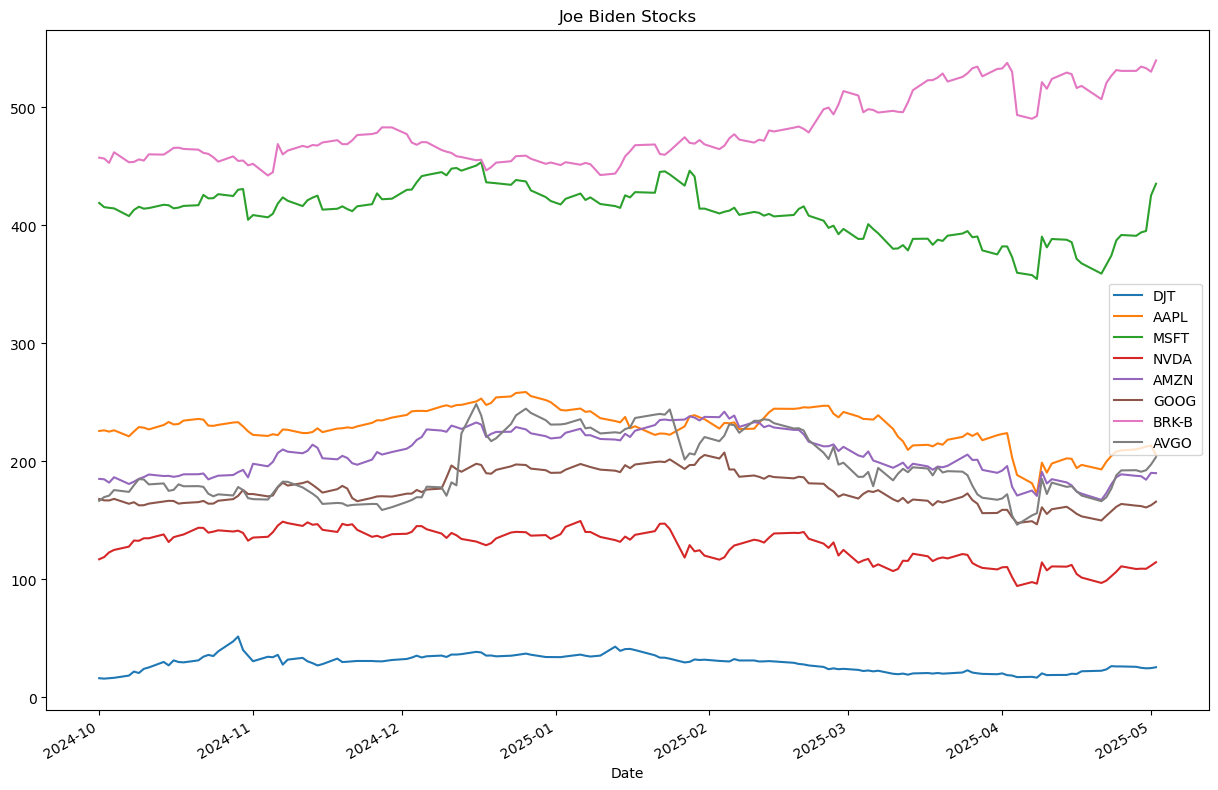

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Joe Biden Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

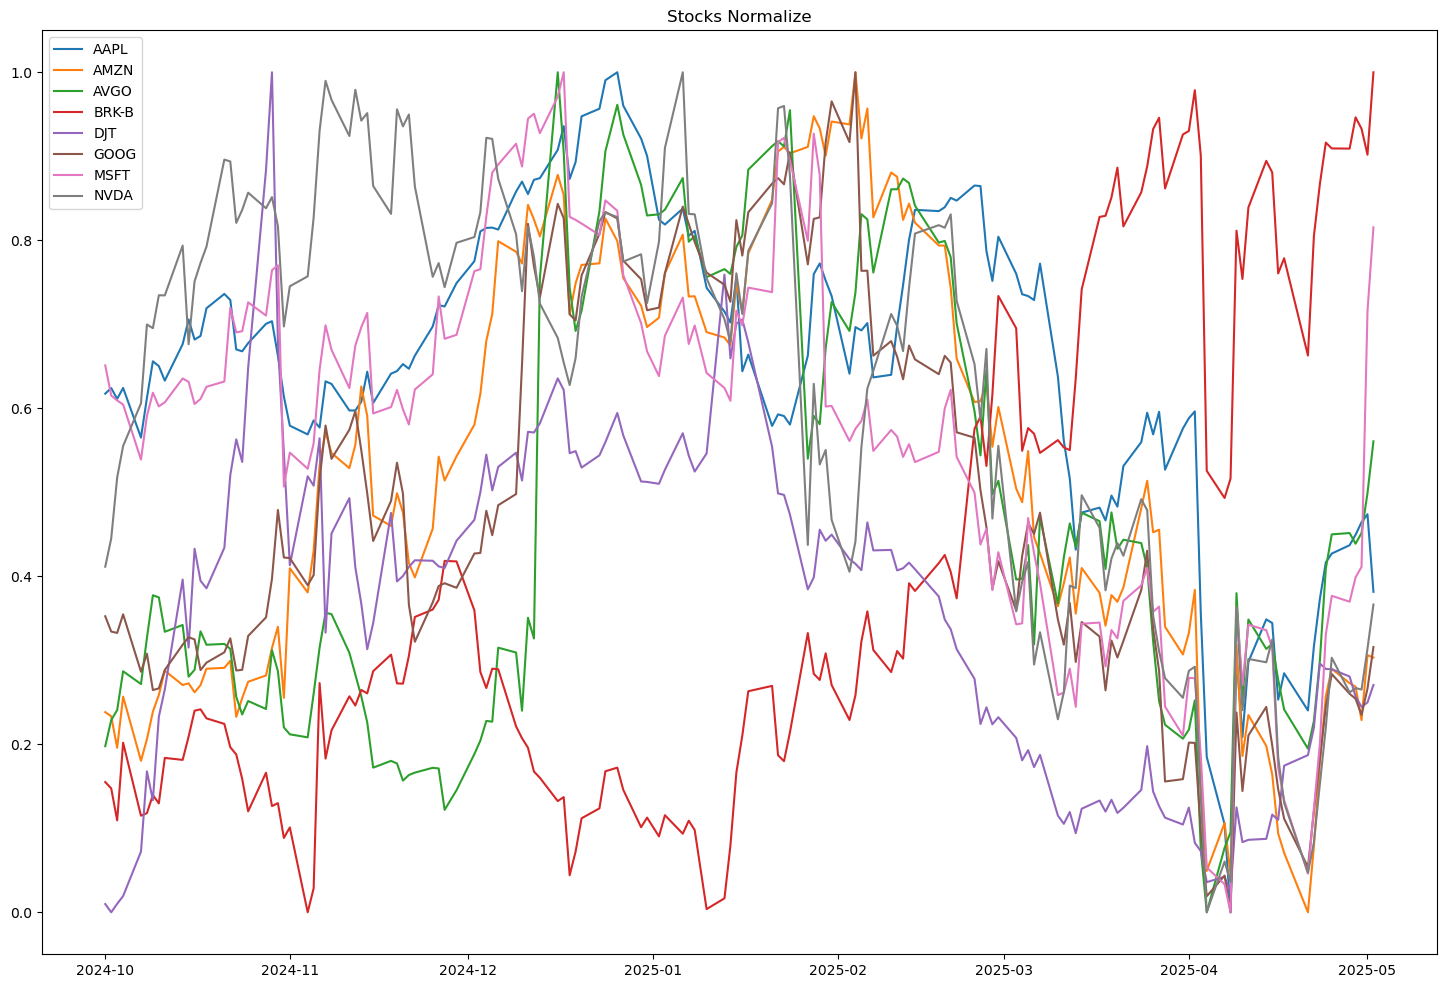

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

Ticker
AAPL     172.419998
AMZN     167.320007
AVGO     146.289993
BRK-B    442.290009
DJT       15.810000
GOOG     146.580002
MSFT     354.559998
NVDA      94.309998
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

DJT: 51.5099983215332
AAPL: 258.7355041503906
MSFT: 453.5505676269531
NVDA: 149.41624450683594
AMZN: 242.05999755859375
GOOG: 207.4736328125
BRK-B: 539.7999877929688
AVGO: 248.5797576904297


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,DJT Return,AAPL Return,MSFT Return,NVDA Return,AMZN Return,GOOG Return,BRK-B Return,AVGO Return
Date,,,,,,,,
2024-10-02,-0.021658,0.002520,-0.008462,0.015812,-0.001999,-0.006591,-0.001618,0.019048
2024-10-03,0.022770,-0.004895,-0.001414,0.033656,-0.015155,-0.000598,-0.008124,0.007207
2024-10-04,0.020408,0.005007,-0.001152,0.016850,0.025005,0.008074,0.019891,0.027634
2024-10-07,0.114545,-0.022531,-0.015671,0.022414,-0.030615,-0.024739,-0.018335,-0.008831


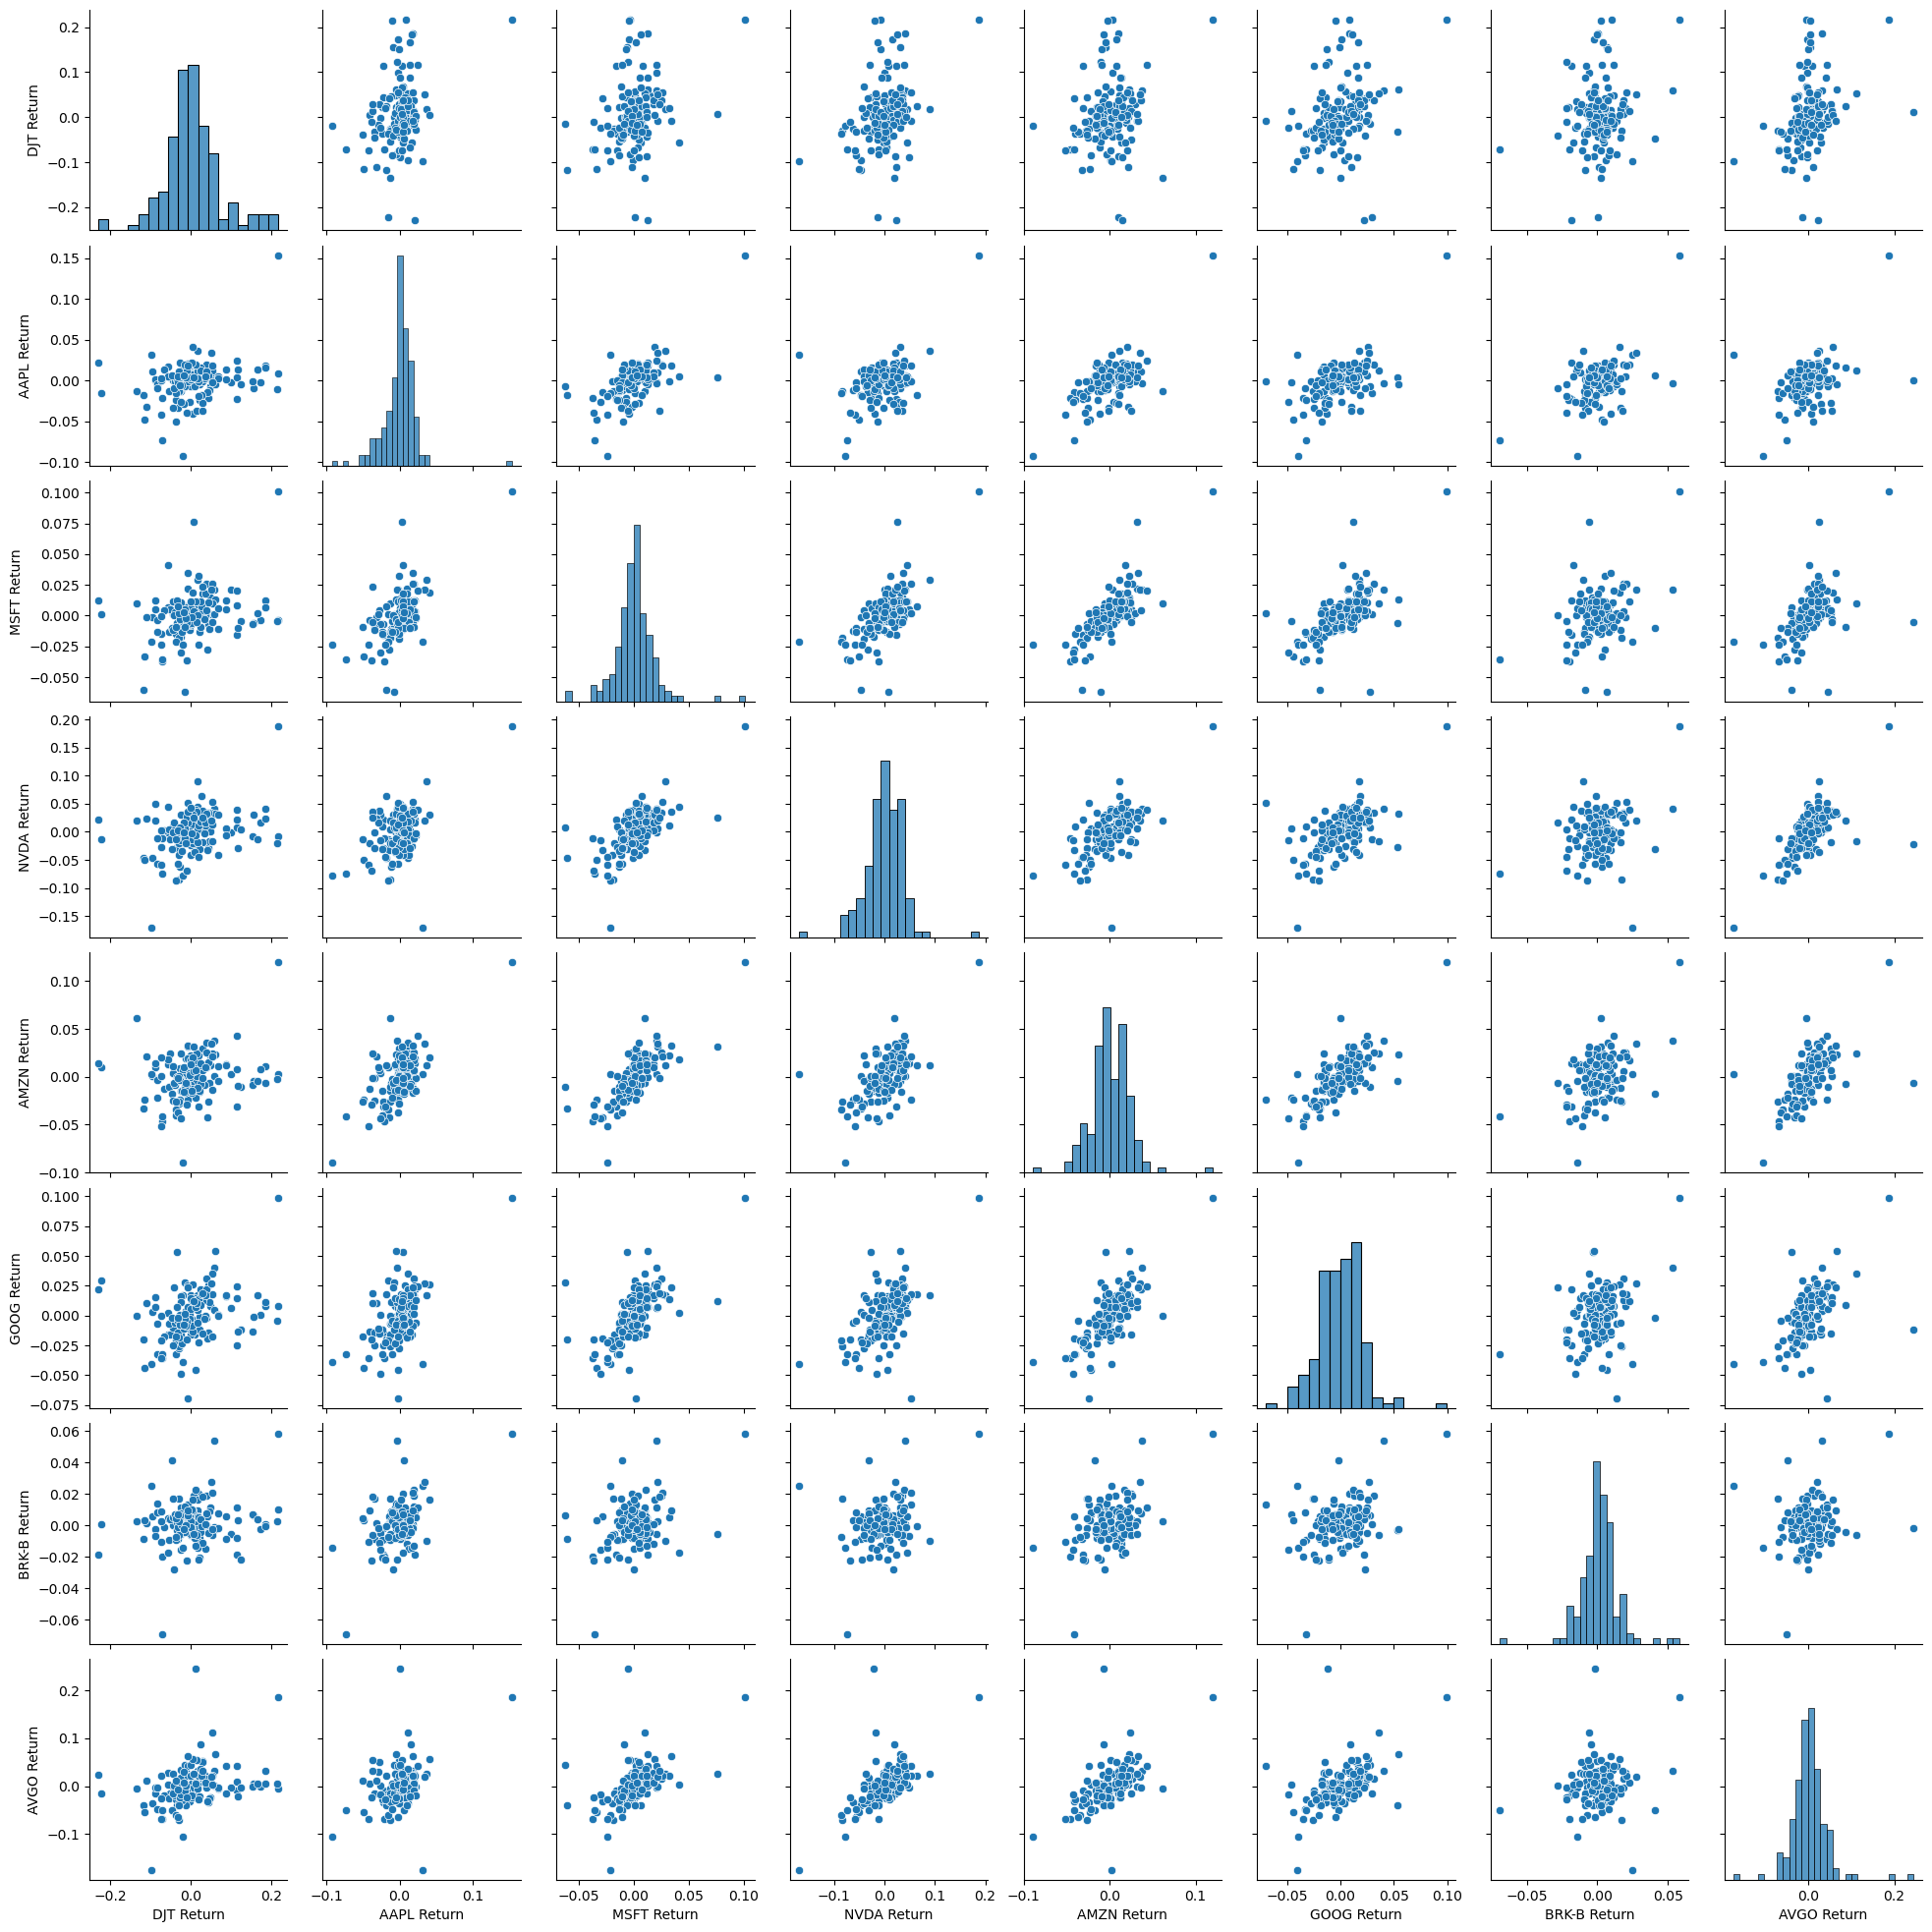

In [19]:
sns.pairplot(returns[1:] )

In [20]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

DJT Return     2025-04-09
AAPL Return    2025-04-09
MSFT Return    2025-04-09
NVDA Return    2025-04-09
AMZN Return    2025-04-09
GOOG Return    2025-04-09
BRK-B Return   2025-04-09
AVGO Return    2024-12-13
dtype: datetime64[ns]


In [21]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

DJT Return     2024-11-07
AAPL Return    2025-04-03
MSFT Return    2025-01-30
NVDA Return    2025-01-27
AMZN Return    2025-04-03
GOOG Return    2025-02-05
BRK-B Return   2025-04-04
AVGO Return    2025-01-27
dtype: datetime64[ns]


In [22]:
returns.corr()

,DJT Return,AAPL Return,MSFT Return,NVDA Return,AMZN Return,GOOG Return,BRK-B Return,AVGO Return
DJT Return,1.000000,0.289908,0.276206,0.319517,0.204060,0.288386,0.170239,0.319364
AAPL Return,0.289908,1.000000,0.610087,0.467624,0.643937,0.559983,0.492186,0.400543
MSFT Return,0.276206,0.610087,1.000000,0.654377,0.758431,0.614815,0.355278,0.506005
NVDA Return,0.319517,0.467624,0.654377,1.000000,0.631225,0.572196,0.251197,0.641267
AMZN Return,0.204060,0.643937,0.758431,0.631225,1.000000,0.741321,0.425193,0.571334
GOOG Return,0.288386,0.559983,0.614815,0.572196,0.741321,1.000000,0.323618,0.529063
BRK-B Return,0.170239,0.492186,0.355278,0.251197,0.425193,0.323618,1.000000,0.178486
AVGO Return,0.319364,0.400543,0.506005,0.641267,0.571334,0.529063,0.178486,1.000000


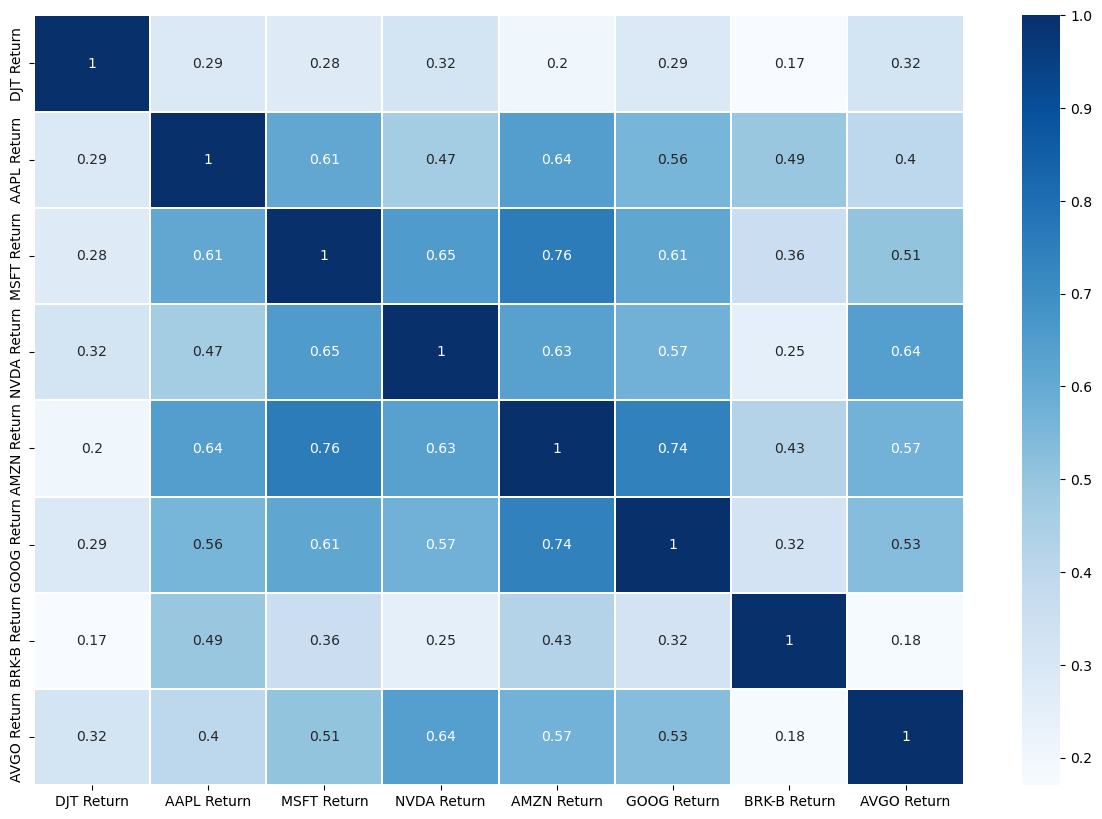

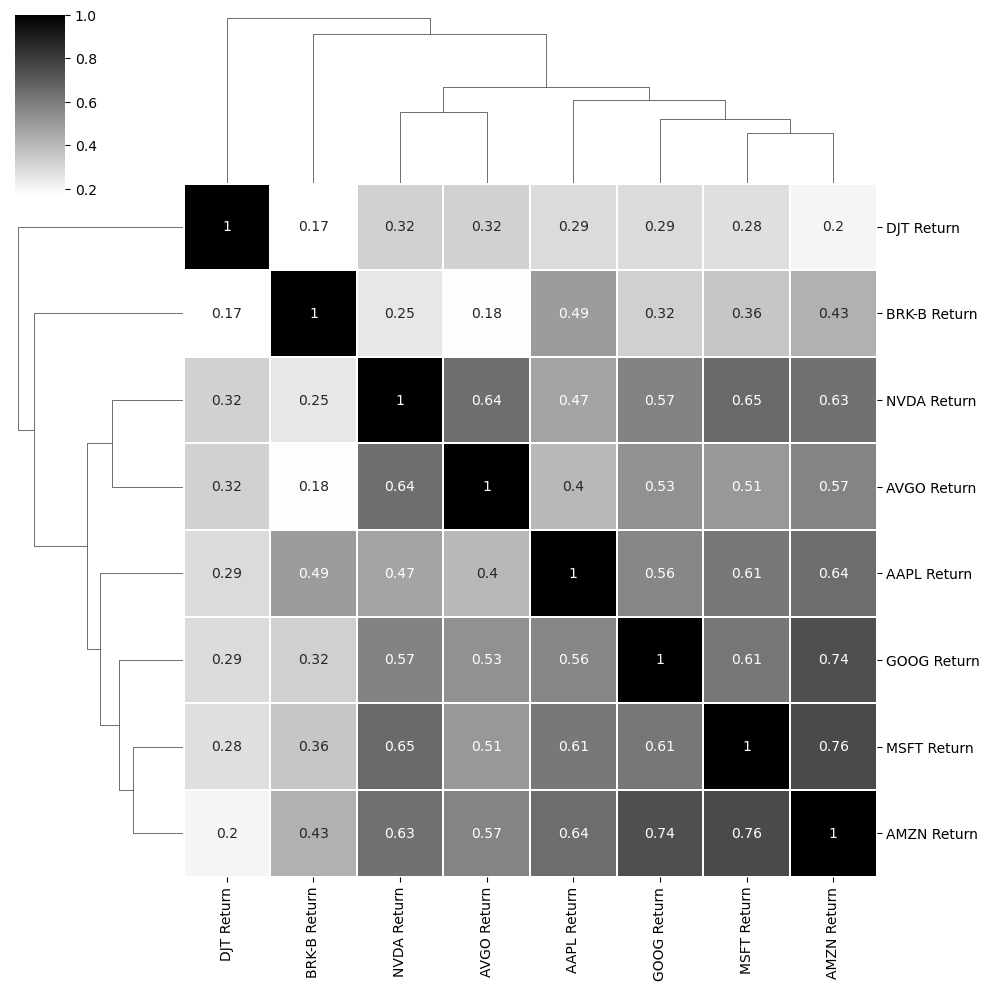

In [23]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

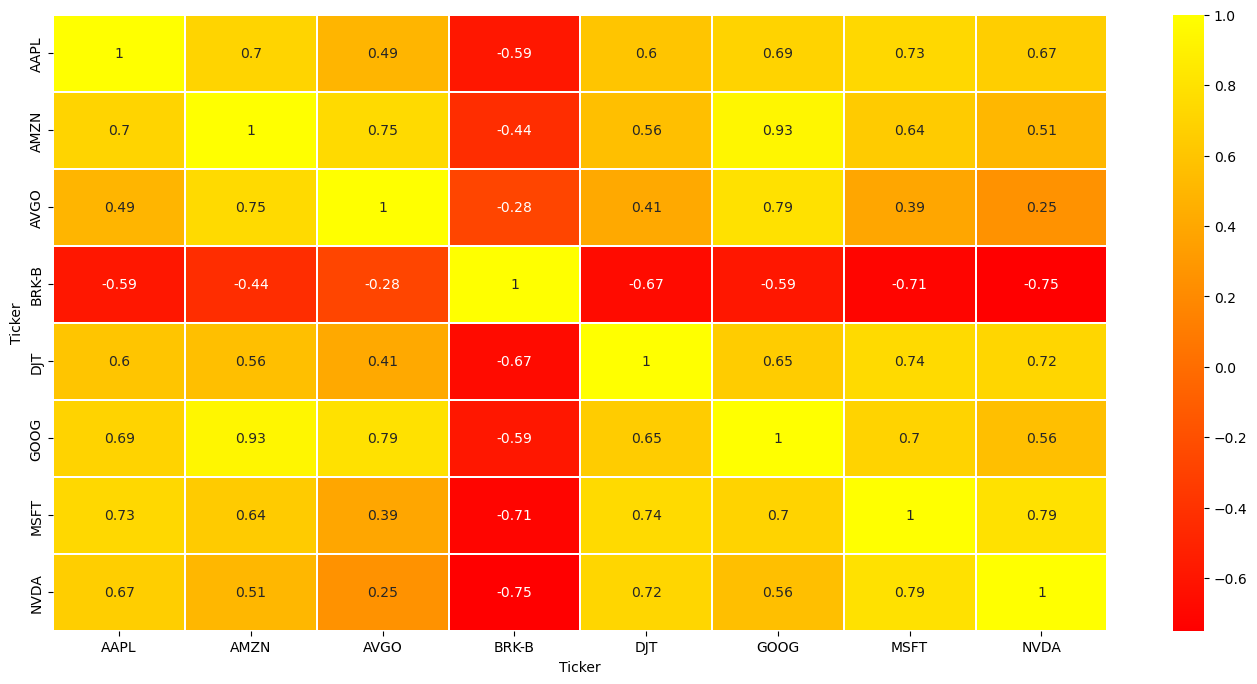

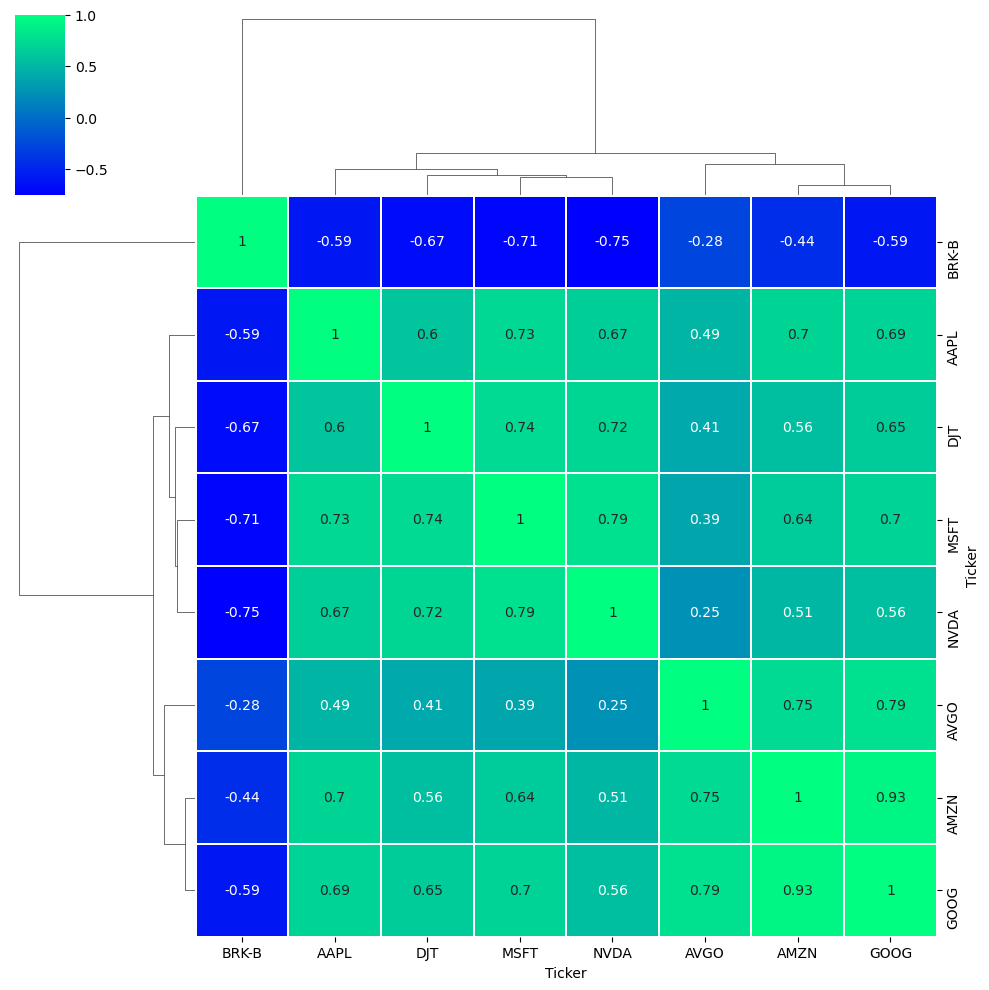

In [24]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [25]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [26]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [27]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.02827935 -0.02841224 -0.05337699 -0.01609701 -0.09044651 -0.02586484
                     -0.02255064 -0.04676721]
95%                 [-0.03666194 -0.03683251 -0.06887441 -0.02102608 -0.11645264 -0.03356296
                     -0.02930923 -0.06039086]
99%                 [-0.0523863  -0.05262753 -0.09794501 -0.0302722  -0.1652358  -0.04800334
                     -0.04198722 -0.08594655]


In [28]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
AAPL: -0.0283
AMZN: -0.0284
AVGO: -0.0534
BRK-B: -0.0161
DJT: -0.0904
GOOG: -0.0259
MSFT: -0.0226
NVDA: -0.0468


In [29]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
AAPL: $2830.0
AMZN: $2840.0
AVGO: $5340.0
BRK-B: $1610.0
DJT: $9040.0
GOOG: $2590.0
MSFT: $2260.0
NVDA: $4680.0


In [30]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
AAPL: $5240.0
AMZN: $5260.0
AVGO: $9790.0
BRK-B: $3030.0
DJT: $16520.0
GOOG: $4800.0
MSFT: $4200.0
NVDA: $8590.0


<Axes: >

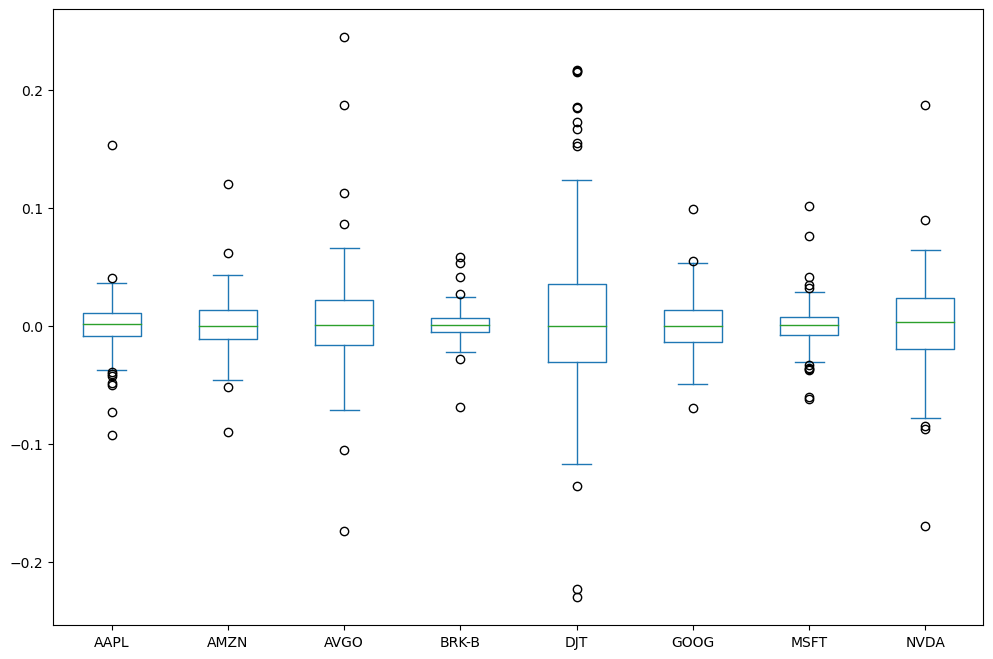

In [31]:
returns.plot(kind='box',figsize=(12,8))

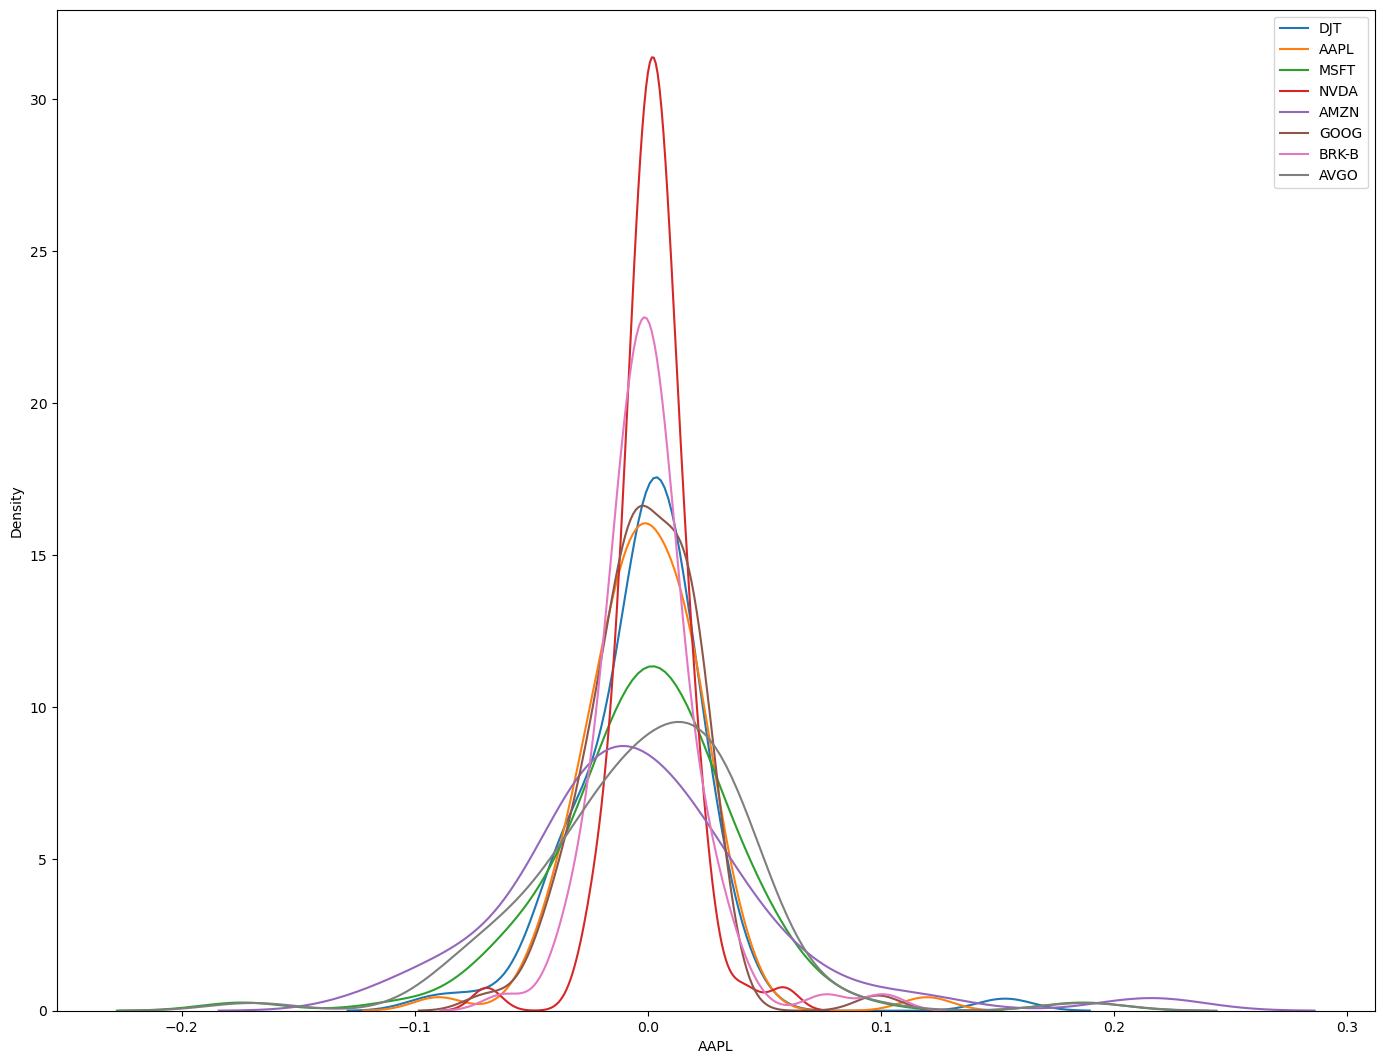

In [32]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.loc["2025-01-01" : "2025-05-04"][r])
    plt.legend(labels=symbols)

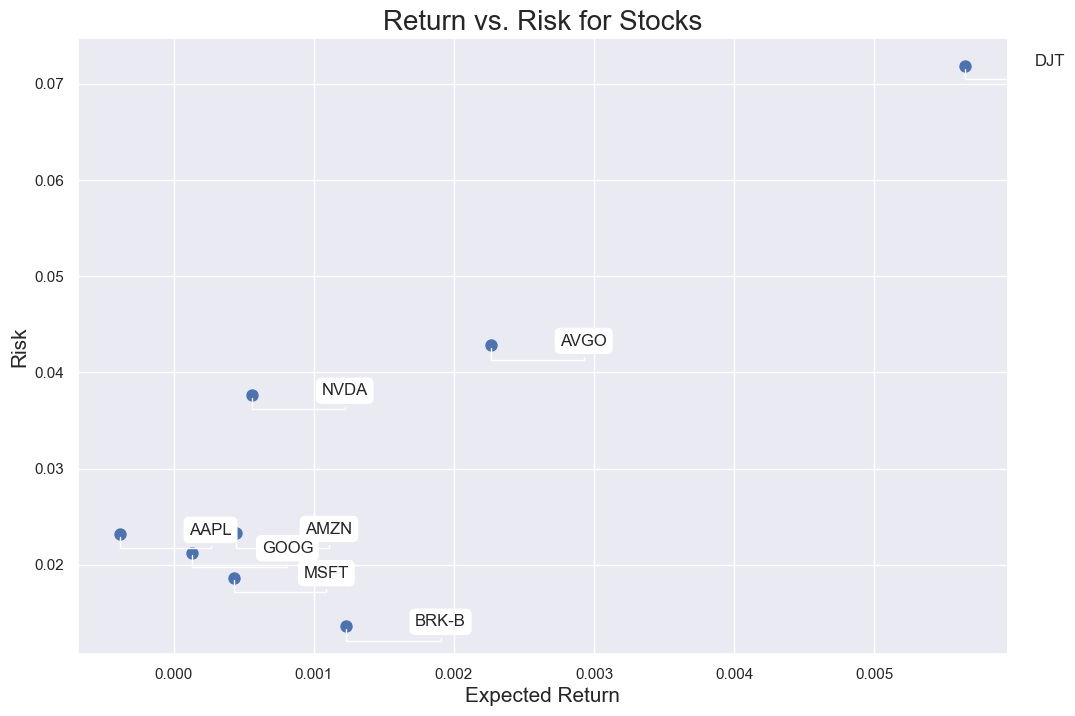

In [33]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

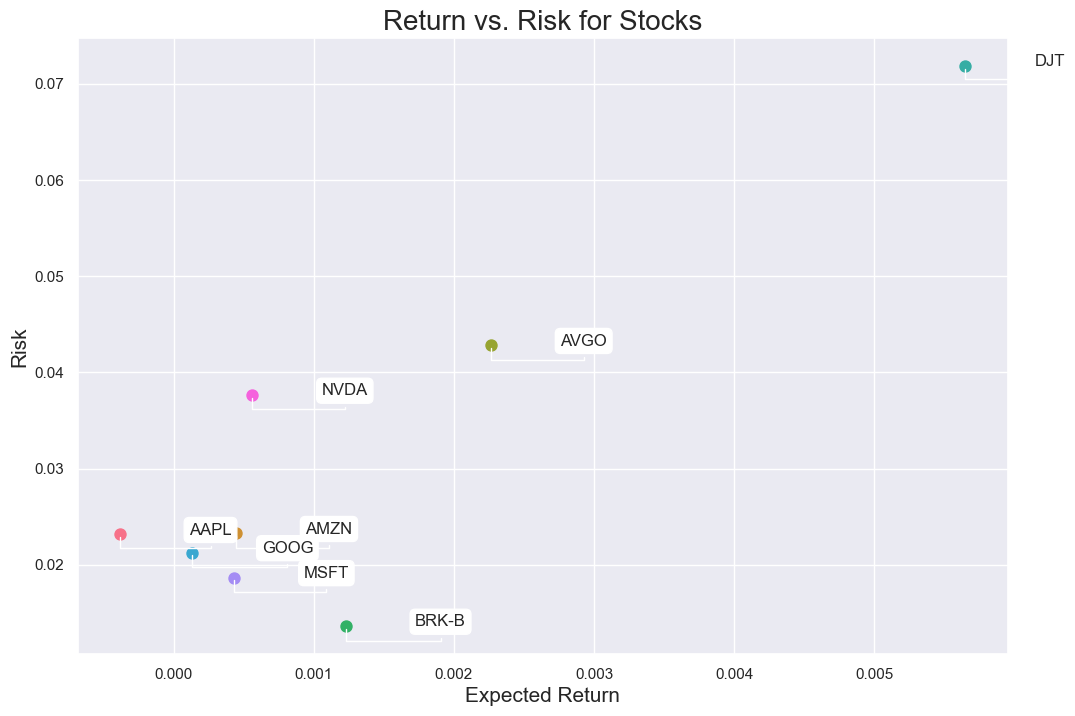

In [34]:
area = np.pi * 20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))

# Generate a color for each stock
colors = sns.color_palette("husl", len(returns.columns))

# Plot each point with a different color
for i, (label, x, y) in enumerate(zip(returns.columns, returns.mean(), returns.std())):
    plt.scatter(x, y, s=area, color=colors[i], label=label)
    plt.annotate(label, xy=(x, y), xytext=(50, 0), textcoords='offset points',
                 arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                 bbox=dict(boxstyle="round", fc="w"))

plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)
plt.show()

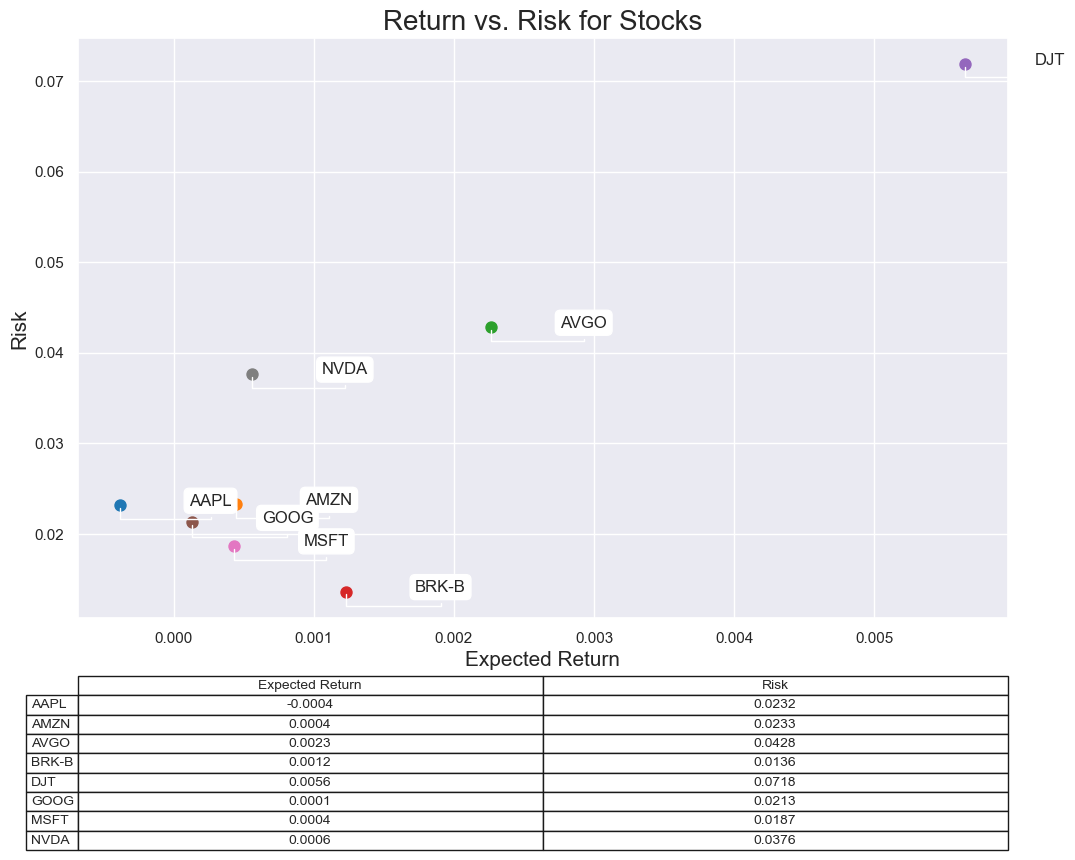

In [35]:
area = np.pi * 20.0
colors = plt.cm.tab10.colors 

# Calculate expected return and risk
expected_returns = returns.mean()
risks = returns.std()

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each stock with a different color
for i, (label, x, y) in enumerate(zip(returns.columns, expected_returns, risks)):
    ax.scatter(x, y, s=area, color=colors[i % len(colors)], label=label)
    ax.annotate(label, xy=(x, y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

ax.set_xlabel("Expected Return", fontsize=15)
ax.set_ylabel("Risk", fontsize=15)
ax.set_title("Return vs. Risk for Stocks", fontsize=20)

# Create a table below the plot
table_data = pd.DataFrame({'Expected Return': expected_returns, 'Risk': risks})
table_data_rounded = table_data.round(4)  # Round values for better display

# Create table in the figure
table = plt.table(cellText=table_data_rounded.values,
                  rowLabels=table_data_rounded.index,
                  colLabels=table_data_rounded.columns,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1.0, 0.3])  # Adjust position and size

table.auto_set_font_size(False)
table.set_fontsize(10)

plt.subplots_adjust(bottom=0.3)  # Make room for the table
plt.show()